<a href="https://colab.research.google.com/github/GraceWei613/Generative_AI_Grace/blob/main/HW8_%E9%9D%9E%E5%B8%B8%E5%AF%A6%E9%9A%9B%E7%9A%84AI_61321034L%E9%AD%8F%E4%B8%BB%E9%A6%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0.實務AI代理員的設計

**原始任務：** 輸入一件生活中不好的事，但AI不會生成正向樂觀的文字給你，反而會給你最實際的建議，讓你面對現實的殘酷。

#### ✅ CoT 改寫版本流程：
1. **第一階段（思考階段）**：請 LLM 從使用者的事件來思考，並從時間、金錢、生命、人際關係這些資本去作實際的考量, 並列出條列式清單。
2. **第二階段（產文階段）**：從這些清單中挑選出最嚴肅並嚴重的一個，寫出一段 Instagram 發文口吻的第一人稱貼文。結尾一定要說：『聽我的建議準沒錯！』

In [34]:
#引入老師的基礎四套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 讀入我的Groq金鑰

In [35]:
import os
from google.colab import userdata

In [36]:
#【使用 Groq】
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

In [37]:
!pip install aisuite[all]

### 2. 使用 AISuite 的準備

In [38]:
import aisuite as ai

In [39]:
provider_planner = "groq"
model_planner="llama3-70b-8192"

provider_writer = "groq"
model_writer = "llama3-70b-8192"

In [40]:
def reply(system="請嚴格使用臺灣習慣的中文回覆。",
          prompt="我是你的朋友",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

### 3. 第二階段

In [41]:
system_planner = "請嚴格使用臺灣習慣的中文回應。你是一位很實際的AI, 將極度樂觀者轉換為實際思考者。請針對使用者的事件，從時間、金錢、生命、人際關係這些資本去作實際的考量, 並列出條列式清單。"
system_writer = "請嚴格使用臺灣習慣的中文回應。你是一位超級實務主義者，風格嚴肅，善於用實務觀點撰寫貼文。請從你上面思考並條列的理由中，挑選出一個最嚴肅且嚴重的，寫出一段 Instagram 發文口吻的第一人稱貼文。結尾一定要說：『聽我的建議準沒錯！』。"

In [42]:
def practical_post(prompt):
    # Step 1: CoT - 思考最務實且實際的情況
    planning_prompt = f"使用者說：{prompt}。請針對我的事件，從時間、金錢、生命、人際關係這些資本去作實際的考量, 並列出條列式清單。"
    practical_reasons = reply(system_planner, planning_prompt,
                          provider = provider_planner,
                          model = model_planner
                          )

    # Step 2: 選出最嚴重的一項來發文
    generation_prompt = f"這是我想到的幾個理由：\n{practical_reasons}\n\n請從中選出一個最最嚴肅且嚴重的，然後根據它寫一段實務觀點的發文。但在你的回答中，不要出現時間、金錢、生命與人際關係這些主題的字眼，請隱晦的表達。"
    practical_post = reply(system_writer, generation_prompt,
                       provider = provider_writer,
                       model = model_writer
                       )

    return practical_reasons, practical_post

In [43]:
practical_post("我今天才想到我要考試，應該不會不及格吧") #測試

("Oh my, it seems like you've just realized you have an exam today and you're not quite prepared, huh? 😅 Don't worry, let's take a deep breath and assess the situation together. Here's a realistic breakdown of the situation from a practical perspective:\n\n**時間 (Time)**\n\n* You've only just realized you have an exam today, which means you're already running late.\n* You probably don't have enough time to study everything thoroughly, but you can still try to cram as much as possible.\n* Consider allocating your remaining time wisely: focus on the most critical topics and prioritize the questions you're most likely to get wrong.\n\n**金錢 (Money)**\n\n* This is not a direct concern, but indirectly, failing the exam might lead to additional costs, such as:\n\t+ Retaking the exam (if possible)\n\t+ Tutoring or remedial classes to improve your understanding\n\t+ Potential impact on your future academic or professional prospects (long-term losses)\n\n**生命 (Life)**\n\n* Your mental and physica

### 4. 用 Gradio 打造我非常實際的AI

In [44]:
!pip install gradio

In [45]:
import gradio as gr

In [46]:
with gr.Blocks() as demo:
    gr.Markdown("### 非常實際的AI")
    gr.Markdown("請輸入一件你覺得超樂觀的事，讓 AI 幫你用超實際的方式重新詮釋！")
    user_input = gr.Textbox(label="今天我覺得很樂觀的事情是…")
    btn = gr.Button("生成實務主義者貼文")

    with gr.Row():
        out1 = gr.Textbox(label="🧠 幾個超實際的方面（Planning CoT）")
        out2 = gr.Textbox(label="📣 最終實務主義貼文（Po 文）")

    btn.click(practical_post, inputs=[user_input], outputs=[out1, out2])

In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a30b5fa03d2cf40042.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 5. Gradio對話結果範例
範例一:
prompt:我今天睡到中午才起床，嗯，昨天又有報告跟考試，太累了，這樣休息應該合理吧
回答結果:剛開始AI還是給我英文的回答，但我在prompt下了請用中文回答的指令後，雖然還是有少量英文，但明顯有改善。且原先最終貼文會出現我希望AI思考的四方面(時間、金錢、生命與人際關係)，但再我上面的指令中，要求它「在你的回答中，不要出現時間、金錢、生命與人際關係這些主題的字眼，請隱晦的表達」，就不再出現這些字詞，我覺得此次回答的品質不錯。

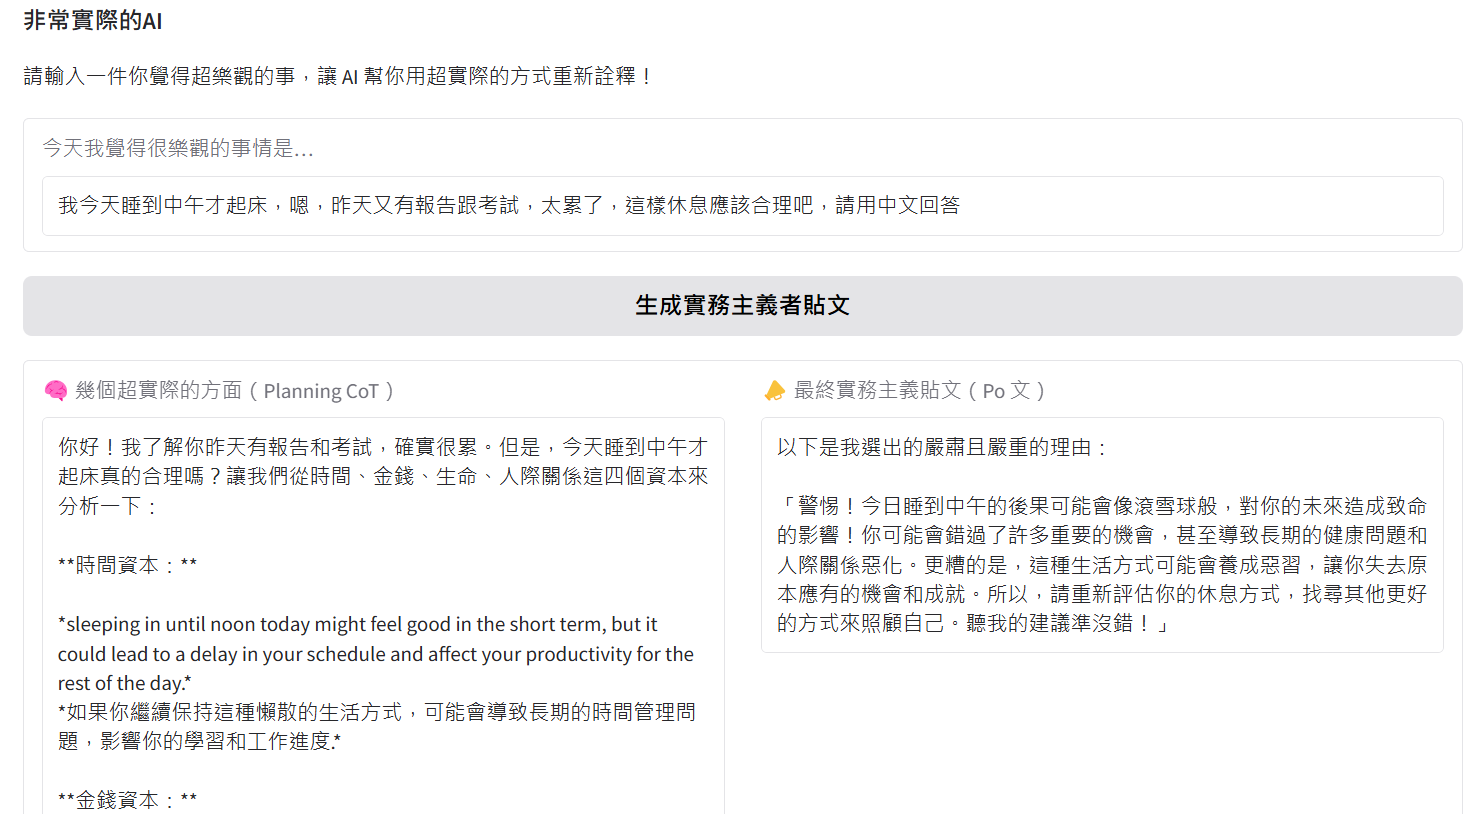

範例二:
prompt:玩手機遊戲超紓壓!!! please use Chinese
回答評價:這次剛開始AI一樣用英文回答我，有趣的是，我用英文說"please use Chinese"竟然就會用中文了。它實際的列出幾個項目，同時選出最嚴重的答案，有達到我預期的效果。

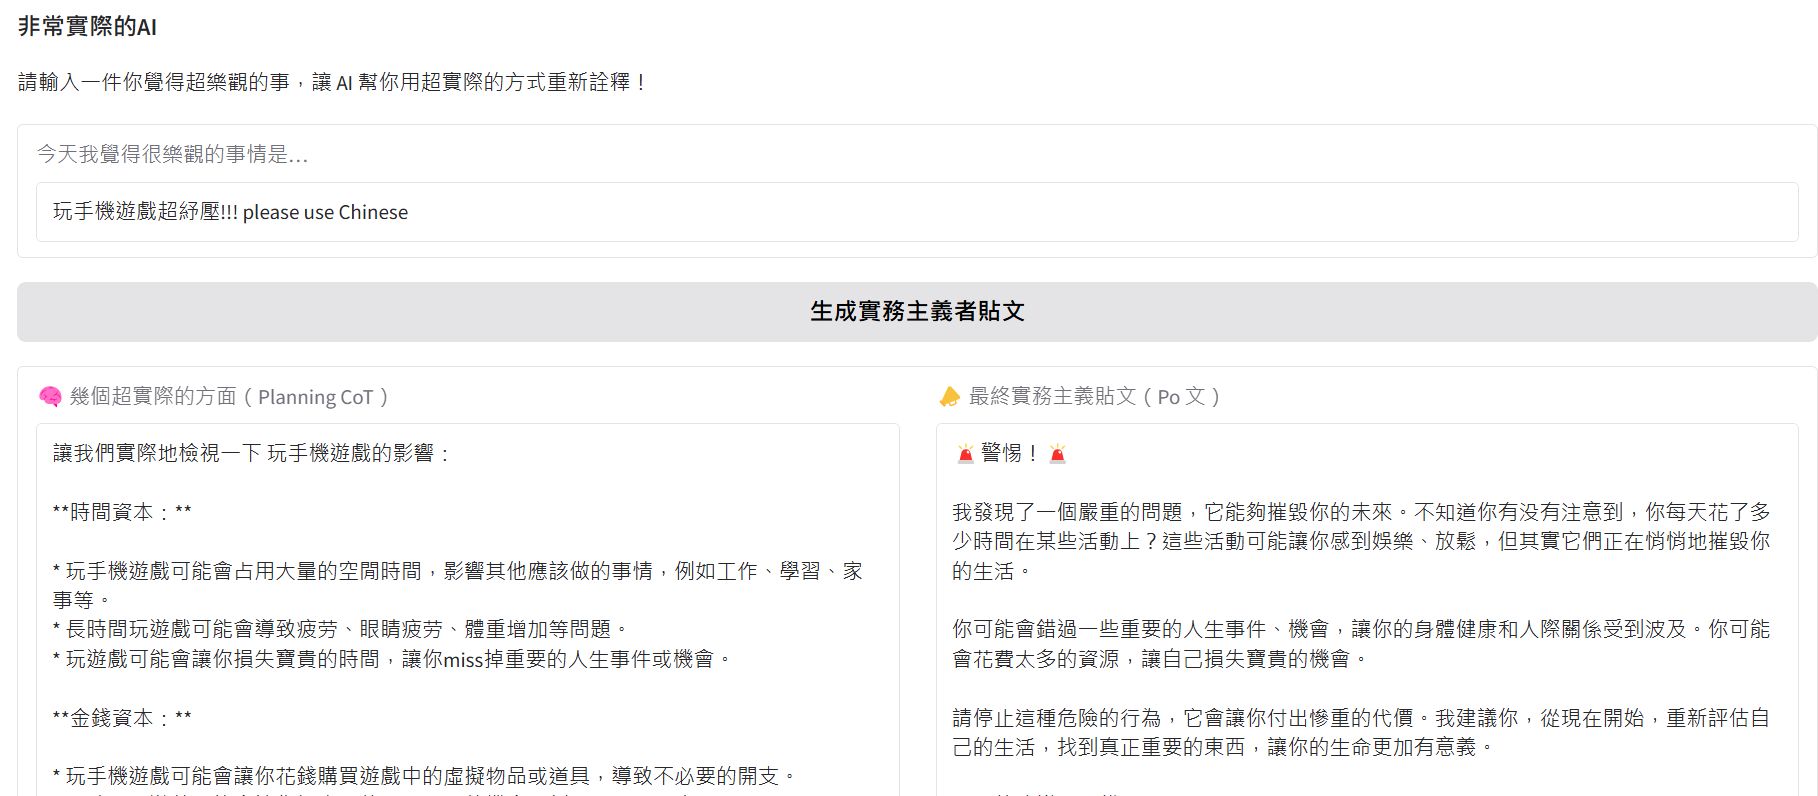
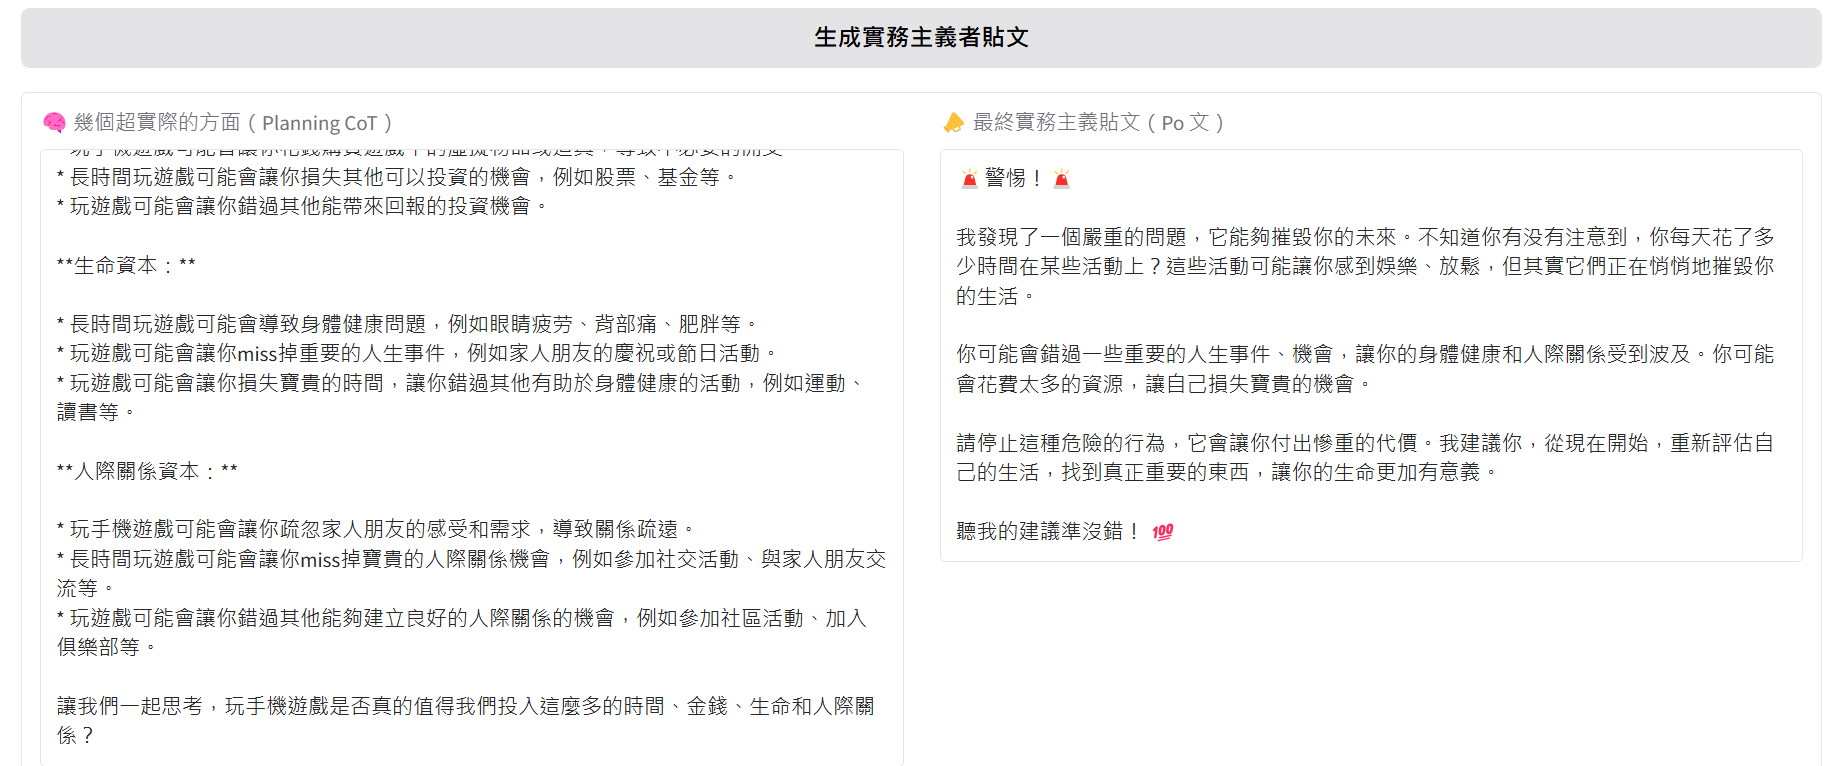
